# Load GPU

Dikarenakan proses analisis ini termasuk dalam deep learning, maka dibutuhkan processor tambahan yakni GPU agar proses komputasi lebih cepat dan efektif.

Hal pertama yang dilakukan yakni mengimpor dan loading GPU yang ada pada Google Colaboratory.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
6.057591114999994
GPU (s):
0.12472844799999905
GPU speedup over CPU: 48x


#Load Drive

Dikarenakan dataset yang digunakan terdapat pada Drive, maka perlu melakukan import dan loading Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install and Load Libraries

Melakukan install dan import libraries yang digunakan dalam project ini.

In [ ]:
!pip install visualkeras
!pip3 install ann_visualizer
!pip install graphviz
!pip install rarfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=2a771cc31260ba9aa834ea0b65a4eddcc1594082c832db07c0f3315e2c35b33e
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB0
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from torchvision.utils import make_grid
import keras
from glob import glob
import pandas as pd
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
import visualkeras
import os
from tqdm import tqdm
import cv2
import matplotlib.cm as cm
from IPython.display import Image, display
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from rarfile import RarFile
from PIL import Image
from keras.models import load_model
from keras.preprocessing import image
import tensorflow as tf
import pickle
tf.config.run_functions_eagerly(True)

## Membuat Set Data Training and Validation 0.7 : 0.3

In [ ]:
import os
import os.path
import shutil
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import random

In [ ]:
image_path =Path('/content/drive/MyDrive/Bangkit/Dataset')

In [ ]:
base_dir = image_path
train_dir = os.path.join(base_dir,'Training')
validation_dir = os.path.join(base_dir, 'Initial Validation')
Poor_dir = os.path.join(base_dir, 'Poor')
Uncertain_dir = os.path.join(base_dir, 'Uncertain')
Okay_dir = os.path.join(base_dir, 'Okay')
Great_dir = os.path.join(base_dir, 'Great')
Excellent_dir = os.path.join(base_dir, 'Excellent')

In [ ]:
train_Poor = os.path.join(train_dir, 'Poor')
val_Poor = os.path.join(validation_dir, 'Poor')

train_Uncertain = os.path.join(train_dir, 'Uncertain')
val_Uncertain = os.path.join(validation_dir, 'Uncertain')

train_Okay = os.path.join(train_dir, 'Okay')
val_Okay = os.path.join(validation_dir, 'Okay')

train_Great = os.path.join(train_dir, 'Great')
val_Great = os.path.join(validation_dir, 'Great')

train_Excellent = os.path.join(train_dir, 'Excellent')
val_Excellent = os.path.join(validation_dir, 'Excellent')

In [ ]:
list_directory=[train_dir,validation_dir,train_Poor,val_Poor,
                train_Uncertain,val_Uncertain,train_Okay,val_Okay, train_Great, val_Great, train_Excellent, val_Excellent]
for i in list_directory:
  os.mkdir(i)

FileExistsError: ignored

In [ ]:
train_Poor_dir, val_Poor_dir = train_test_split(os.listdir(Poor_dir), test_size = 0.30)
train_Uncertain_dir, val_Uncertain_dir = train_test_split(os.listdir(Uncertain_dir), test_size = 0.30)
train_Okay_dir, val_Okay_dir = train_test_split(os.listdir(Okay_dir), test_size = 0.30)
train_Great_dir, val_Great_dir = train_test_split(os.listdir(Great_dir), test_size = 0.30)
train_Excellent_dir, val_Excellent_dir = train_test_split(os.listdir(Excellent_dir), test_size = 0.30)

for file in train_Poor_dir:
  shutil.copy(os.path.join(Poor_dir, file), os.path.join(train_Poor, file))
for file in train_Uncertain_dir:
  shutil.copy(os.path.join(Uncertain_dir,file), os.path.join(train_Uncertain,file))
for file in train_Okay_dir:
  shutil.copy(os.path.join(Okay_dir,file), os.path.join(train_Okay,file))
for file in train_Great_dir:
  shutil.copy(os.path.join(Great_dir,file), os.path.join(train_Great,file))
for file in train_Excellent_dir:
  shutil.copy(os.path.join(Excellent_dir,file), os.path.join(train_Excellent,file))
for file in val_Poor_dir:
  shutil.copy(os.path.join(Poor_dir, file), os.path.join(val_Poor, file))
for file in val_Uncertain_dir:
  shutil.copy(os.path.join(Uncertain_dir,file), os.path.join(val_Uncertain,file))
for file in val_Okay_dir:
  shutil.copy(os.path.join(Okay_dir,file), os.path.join(val_Okay,file))
for file in val_Great_dir:
  shutil.copy(os.path.join(Great_dir,file), os.path.join(val_Great,file))
for file in val_Excellent_dir:
  shutil.copy(os.path.join(Excellent_dir,file), os.path.join(val_Excellent,file))

## Membuat Set Data Training, Validation, and Testing 0.7 : 0.15 : 0.15

In [ ]:
image_path2= Path('/content/drive/MyDrive/Bangkit/Dataset/Initial Validation/')

In [ ]:
base_dir2 = image_path2
test_dir = os.path.join(base_dir2, 'Testing')
validation_dir = os.path.join(base_dir2, 'Validation')
Poor_dir = os.path.join(base_dir2, 'Poor')
Uncertain_dir = os.path.join(base_dir2, 'Uncertain')
Okay_dir = os.path.join(base_dir2, 'Okay')
Great_dir = os.path.join(base_dir2, 'Great')
Excellent_dir = os.path.join(base_dir2, 'Excellent')

In [ ]:
test_Poor = os.path.join(test_dir, 'Poor')
val_Poor = os.path.join(validation_dir, 'Poor')

test_Uncertain = os.path.join(test_dir, 'Uncertain')
val_Uncertain = os.path.join(validation_dir, 'Uncertain')

test_Okay = os.path.join(test_dir, 'Okay')
val_Okay = os.path.join(validation_dir, 'Okay')

test_Great = os.path.join(test_dir, 'Great')
val_Great = os.path.join(validation_dir, 'Great')

test_Excellent = os.path.join(test_dir, 'Excellent')
val_Excellent = os.path.join(validation_dir, 'Excellent')

In [ ]:
list_directory=[test_dir,validation_dir,test_Poor,val_Poor,
                test_Uncertain,val_Uncertain,test_Okay,val_Okay, test_Great, val_Great, test_Excellent, val_Excellent]
for i in list_directory:
  os.mkdir(i)

FileExistsError: ignored

In [ ]:
test_Poor_dir, val_Poor_dir = train_test_split(os.listdir(Poor_dir), test_size = 0.50)
test_Uncertain_dir, val_Uncertain_dir = train_test_split(os.listdir(Uncertain_dir), test_size = 0.50)
test_Okay_dir, val_Okay_dir = train_test_split(os.listdir(Okay_dir), test_size = 0.50)
test_Great_dir, val_Great_dir = train_test_split(os.listdir(Great_dir), test_size = 0.50)
test_Excellent_dir, val_Excellent_dir = train_test_split(os.listdir(Excellent_dir), test_size = 0.50)

for file in test_Poor_dir:
  shutil.copy(os.path.join(Poor_dir, file), os.path.join(test_Poor, file))
for file in test_Uncertain_dir:
  shutil.copy(os.path.join(Uncertain_dir,file), os.path.join(test_Uncertain,file))
for file in test_Okay_dir:
  shutil.copy(os.path.join(Okay_dir,file), os.path.join(test_Okay,file))
for file in test_Great_dir:
  shutil.copy(os.path.join(Great_dir,file), os.path.join(test_Great,file))
for file in test_Excellent_dir:
  shutil.copy(os.path.join(Excellent_dir,file), os.path.join(test_Excellent,file))
for file in val_Poor_dir:
  shutil.copy(os.path.join(Poor_dir, file), os.path.join(val_Poor, file))
for file in val_Uncertain_dir:
  shutil.copy(os.path.join(Uncertain_dir,file), os.path.join(val_Uncertain,file))
for file in val_Okay_dir:
  shutil.copy(os.path.join(Okay_dir,file), os.path.join(val_Okay,file))
for file in val_Great_dir:
  shutil.copy(os.path.join(Great_dir,file), os.path.join(val_Great,file))
for file in val_Excellent_dir:
  shutil.copy(os.path.join(Excellent_dir,file), os.path.join(val_Excellent,file))

# Data Loading

Membagi dataset menjadi dua bagian, yakni data latih, data validasi dengan perbandingan 8:2.

In [ ]:
train_path = '/content/drive/MyDrive/Bangkit/Dataset/Training'
val_path = '/content/drive/MyDrive/Bangkit/Dataset/Initial Validation/Validation'
test_path = '/content/drive/MyDrive/Bangkit/Dataset/Initial Validation/Testing'

# Exploratory Data Analysis

Melakukan eksplorasi pada dataset yang ada.

Yang pertama yakni mengecek jumlah kelas yang ada.

In [ ]:
numberOfClass = len(glob(train_path+"/*")) 
print("Number of Class: ",numberOfClass)

Number of Class:  5


Diperoleh terdapat 5 kelas dalam dataset.

Selanjutnya dilakukan pendefinisian untuk visualisasi sampel citra rontgen dada.

In [ ]:
def sampleImage(sampe_image_path):
  img = load_img(sampe_image_path)
  x = img_to_array(img)
  print(x.shape)
  plt.imshow(img)
  plt.axis("off")
  plt.show()

Excellent

(2812, 2521, 3)


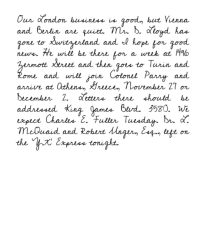

In [ ]:
sample_image_path = "/content/drive/MyDrive/Bangkit/Dataset/Training/Excellent/Untitled-1-Recovered-Recovered2_0000s_0000_Our London business is good, but Vienna and Berlin are quiet. M.jpg"
sampleImage(sample_image_path)

Citra di atas merupakan citra handwriting dengan ukuran piksel 2812 x 2521.

Great

(2813, 2521, 3)


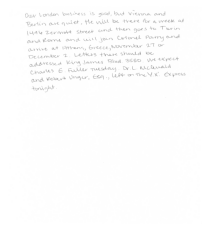

In [ ]:
sample_image_path = "/content/drive/MyDrive/Bangkit/Dataset/Training/Great/w0003_s02_pLND_r01.png"
sampleImage(sample_image_path)

Citra di atas merupakan citra handwriting dengan ukuran piksel 2808 x 2521.

Okay

(2821, 2521, 3)


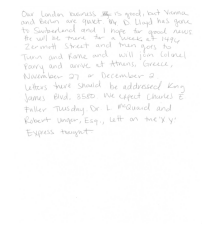

In [ ]:
sample_image_path = "/content/drive/MyDrive/Bangkit/Dataset/Training/Okay/w0001_s01_pLND_r03.png"
sampleImage(sample_image_path)

Citra di atas merupakan citra handwriting dengan ukuran piksel 2808 x 2521.

Uncertain

(2811, 2521, 3)


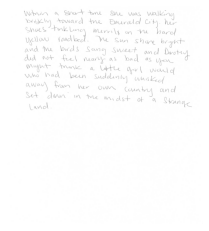

In [ ]:
sample_image_path = "/content/drive/MyDrive/Bangkit/Dataset/Training/Uncertain/w0001_s01_pWOZ_r03.png"
sampleImage(sample_image_path)

Citra di atas merupakan citra handwriting dengan ukuran piksel 2811 x 2521.

Poor

(2809, 2521, 3)


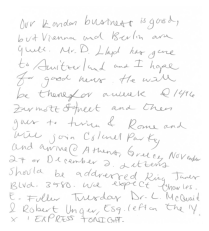

In [ ]:
sample_image_path = "/content/drive/MyDrive/Bangkit/Dataset/Training/Poor/w0004_s02_pLND_r01.png"
sampleImage(sample_image_path)

Citra di atas merupakan citra handwriting dengan ukuran piksel 2824 x 2521.

Selanjutnya dilakukan pengecekan kembali informasi dataset

In [ ]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset/Training/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 3066 citra handwriting 5 kelas pada dataset
Nama kelas: ['Poor', 'Uncertain', 'Okay', 'Great', 'Excellent']
Banyak kelas: [675, 651, 660, 501, 579]
Dimensi citra: 2521 x 2815


In [ ]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset/Initial Validation/Validation/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 368 citra handwriting 5 kelas pada dataset
Nama kelas: ['Poor', 'Uncertain', 'Okay', 'Great', 'Excellent']
Banyak kelas: [29, 47, 142, 108, 42]
Dimensi citra: 2521 x 2818


In [ ]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset/Initial Validation/Testing/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 365 citra handwriting 5 kelas pada dataset
Nama kelas: ['Poor', 'Uncertain', 'Okay', 'Great', 'Excellent']
Banyak kelas: [29, 47, 141, 107, 41]
Dimensi citra: 2521 x 2811


Selanjutnya melihat secara random 9 citra pada semua kelas.

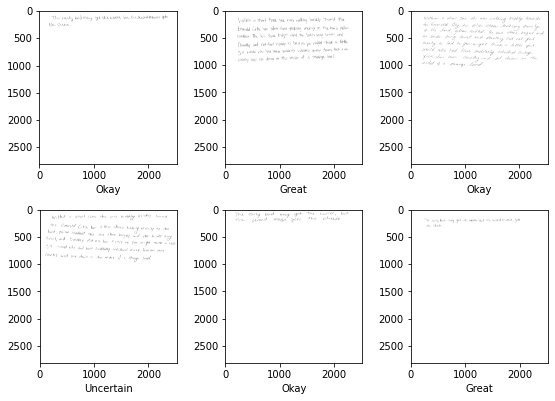

In [ ]:
plt.subplots(1,3,figsize=(8,8))
for i,k in enumerate(np.random.randint(numTotal, size=6)):  
    im = Image.open(imageFilesList[k])                    
    arr = np.array(im)
    plt.subplot(3,3,i+1)
    plt.xlabel(classNames[imageClass[k]])
    plt.imshow(arr,cmap='gray',vmin=0,vmax=255)
plt.tight_layout()
plt.show()

# Data Preprocessing

Data processing pertama yang dilakukan yakni augmentasi data pada data latih, seperti zoom range, horizontal flip, dan shear range. Kemudian merubah dimensi citra menjadi 224 x 224 piksel.

In [ ]:
def custom_augmentation(np_tensor):
 
  def random_contrast(np_tensor):
    return tf.image.random_contrast(np_tensor, 0.5, 2)
  
  augmnted_tensor = random_contrast(np_tensor)
  return np.array(augmnted_tensor)

In [ ]:
train_data_gen = ImageDataGenerator(brightness_range=[0.7,1.0],
                                    zoom_range=[1.0,1.7],
                                    preprocessing_function= preprocess_input
                                    # preprocessing_function=custom_augmentation
                                    )

train = train_data_gen.flow_from_directory(directory= train_path,
                                           color_mode='grayscale', 
                                           target_size=(224,224)
                                           )

Found 3066 images belonging to 5 classes.


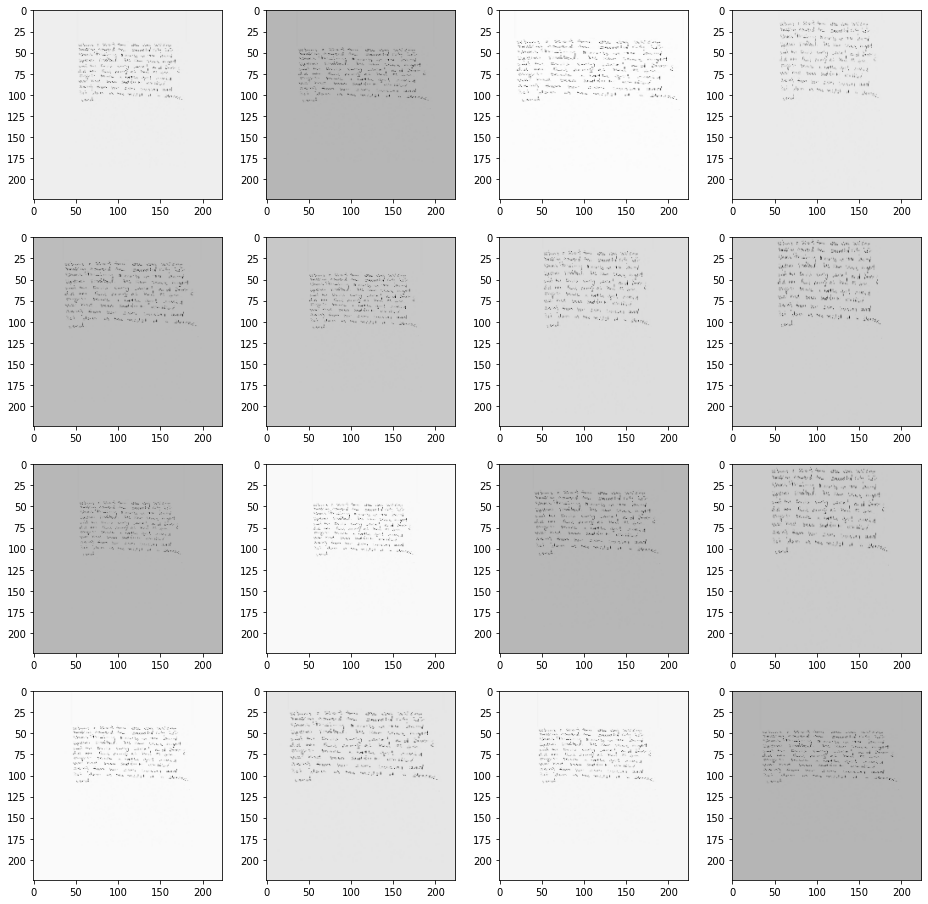

In [ ]:
image_path = "/content/drive/MyDrive/Bangkit/Dataset/Training/Uncertain/w0001_s01_pWOZ_r03.png"
img = keras.preprocessing.image.load_img(image_path, target_size= (224,224))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)



pic = train_data_gen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))

for i in range(1,17):
   plt.subplot(4, 4, i)
   batch = pic.next()
   image_ = batch[0].astype('uint8')
   plt.imshow(image_)
plt.show()

Pada data validasi juga dilakukan perubahan dimensi citra menjadi 224 x 224 piksel

In [ ]:
validation_data_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

valid = validation_data_gen.flow_from_directory(directory= val_path,
                                                color_mode='grayscale', 
                                                target_size=(224,224)
                                                )

Found 368 images belonging to 5 classes.


Pada data uji juga dilakukan perubahan dimensi citra menjadi 224 x 224 piksel

In [ ]:
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input )

test = train_data_gen.flow_from_directory(directory= test_path ,
                                          color_mode='grayscale', 
                                          target_size=(224,224), 
                                          shuffle= False
                                          )

Found 365 images belonging to 5 classes.


In [ ]:
train.class_indices

{'Excellent': 0, 'Great': 1, 'Okay': 2, 'Poor': 3, 'Uncertain': 4}

Berikut merupakan visualisasi dari augmentasi data yang dilakukan pada data latih.

In [ ]:
class_type = {0:'Excellent',  1 : 'Great', 2:'Okay', 3:'Poor',4:'Uncertain'}

In [ ]:
labels = ['Excellent', 'Great', 'Okay', 'Poor','Uncertain']

## Balancing Training Data

### Poor

In [ ]:
from PIL import Image, ImageEnhance

tempDir = '/content/drive/MyDrive/Bangkit/Dataset/PoorTemp'
tempDir2 = '/content/drive/MyDrive/Bangkit/Dataset/PoorTemp2'
tempDir3 = '/content/drive/MyDrive/Bangkit/Dataset/PoorTemp3'
tempDir4 = '/content/drive/MyDrive/Bangkit/Dataset/PoorTemp4'
poorDir = '/content/drive/MyDrive/Bangkit/Dataset/Training/Poor'

#### tempDir

In [ ]:
for filename in os.listdir(poorDir):
    shutil.copy(os.path.join(poorDir, filename), os.path.join(tempDir, filename))

In [ ]:
for filename in os.listdir(tempDir):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited.png'
  # os.rename(filename, )
  # f = os.path.splitext(f)[0]
  # print(f)
  os.rename(os.path.join(tempDir, filename), os.path.join(tempDir, new_f))
    # f = os.path.join(poorDir, filename)
    # # checking if it is a file
    # if os.path.isfile(f):
    #     print(os.path.splitext(f)[0])
    # os.path.splitext(f)[0]
    


# for file in os.listdir(poorDir) :
#     f_img = poorDir+"/"+file
#     img = Image.open(f_img)
#     enhancer = ImageEnhance.Contrast(img)
#     factor = 1.5 #increase contrast
#     im_output = enhancer.enhance(factor)
#     im_output.save(Path(f_img).stem + "edited.png")

In [ ]:
count=0
for filename in os.listdir(tempDir):
  f = filename
  # print(f)
  count +=1
print(count)

135


In [ ]:
for filename in os.listdir(tempDir):
    # new_f_contrasted_name = os.path.splitext(f)[0] + '-contrasted.png'
    # new_f_contrasted = os.path.join(tempDir, new_f)
    f_img = os.path.join(tempDir, filename)
    # img = Image.open(f_img)
    
    # enhancer = ImageEnhance.Contrast(im)
    # factor = 1.5 #increase contrast
    # im_output = enhancer.enhance(factor)
    # # im_output.save(new_f_contrasted)
    # im_output.save(f_img)
    # # img.save(f_img)

    # f_img = f+"/"+file
    img = Image.open(f_img)

    # img = img.resize((2296,1724))
    enhancer = ImageEnhance.Contrast(img)
    factor = 1.5
    img = enhancer.enhance(factor)
    
    img.save(f_img)
    # print(f_img)

#### tempDir2

In [ ]:
for filename in os.listdir(poorDir):
  # print(filename)
  shutil.copy(os.path.join(poorDir, filename), os.path.join(tempDir2, filename))

In [ ]:
for filename in os.listdir(tempDir2):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited-sharpen.png'

  os.rename(os.path.join(tempDir2, filename), os.path.join(tempDir2, new_f))


In [ ]:
count=0
for filename in os.listdir(tempDir2):
  f = filename
  # print(f)
  count +=1
print(count)

135


In [ ]:
for filename in os.listdir(tempDir2):

    f_img = os.path.join(tempDir2, filename)

    img = Image.open(f_img)

    enhancer = ImageEnhance.Sharpness(img)
    factor = 1.5
    img = enhancer.enhance(factor)
    
    img.save(f_img)
    # print(f_img)

#### tempDir3

In [ ]:
for filename in os.listdir(poorDir):
    shutil.copy(os.path.join(poorDir, filename), os.path.join(tempDir3, filename))

In [ ]:
for filename in os.listdir(tempDir3):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited-contrasted2.png'

  os.rename(os.path.join(tempDir3, filename), os.path.join(tempDir3, new_f))


In [ ]:
count=0
for filename in os.listdir(tempDir3):
  f = filename
  # print(f)
  count +=1
print(count)

135


In [ ]:
for filename in os.listdir(tempDir3):

    f_img = os.path.join(tempDir3, filename)

    img = Image.open(f_img)

    enhancer = ImageEnhance.Contrast(img)
    factor = 1.25
    img = enhancer.enhance(factor)
    
    img.save(f_img)
    # print(f_img)

#### tempDir4

In [ ]:
for filename in os.listdir(poorDir):
    shutil.copy(os.path.join(poorDir, filename), os.path.join(tempDir4, filename))

In [ ]:
for filename in os.listdir(tempDir4):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited-brightened.png'

  os.rename(os.path.join(tempDir4, filename), os.path.join(tempDir4, new_f))


In [ ]:
count=0
for filename in os.listdir(tempDir4):
  f = filename
  # print(f)
  count +=1
print(count)

135


In [ ]:
for filename in os.listdir(tempDir4):

    f_img = os.path.join(tempDir4, filename)

    img = Image.open(f_img)

    enhancer = ImageEnhance.Contrast(img)
    factor = 1.25
    img = enhancer.enhance(factor)
    enhancer = Image.Enchance.Sharpness(img)
    factor = 1.25
    img = enhancer.enhance(factor)

    img.save(f_img)
    # print(f_img)

### Uncertain

In [ ]:
tempDirUncertain = '/content/drive/MyDrive/Bangkit/Dataset/UncertainTemp'
tempDirUncertain2 = '/content/drive/MyDrive/Bangkit/Dataset/UncertainTemp2'
uncertainDir = '/content/drive/MyDrive/Bangkit/Dataset/Training/Uncertain'

#### tempDirUncertain

In [ ]:
for filename in os.listdir(uncertainDir):
    shutil.copy(os.path.join(uncertainDir, filename), os.path.join(tempDirUncertain, filename))

In [ ]:
for filename in os.listdir(tempDirUncertain):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited.png'
  # os.rename(filename, )
  # f = os.path.splitext(f)[0]
  # print(f)
  os.rename(os.path.join(tempDirUncertain, filename), os.path.join(tempDirUncertain, new_f))

In [ ]:
count=0
for filename in os.listdir(tempDirUncertain):
  f = filename
  # print(f)
  count +=1
print(count)

217


In [ ]:
for filename in os.listdir(tempDirUncertain):
    f_img = os.path.join(tempDirUncertain, filename)
    img = Image.open(f_img)

    enhancer = ImageEnhance.Contrast(img)
    factor = 1.5
    img = enhancer.enhance(factor)
    
    img.save(f_img)


#### tempDirUncertain2

In [ ]:
for filename in os.listdir(uncertainDir):
    shutil.copy(os.path.join(uncertainDir, filename), os.path.join(tempDirUncertain2, filename))

In [ ]:
for filename in os.listdir(tempDirUncertain2):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited-sharpened.png'
  # os.rename(filename, )
  # f = os.path.splitext(f)[0]
  # print(f)
  os.rename(os.path.join(tempDirUncertain2, filename), os.path.join(tempDirUncertain2, new_f))

In [ ]:
count=0
for filename in os.listdir(tempDirUncertain2):
  f = filename
  # print(f)
  count +=1
print(count)

217


In [ ]:
for filename in os.listdir(tempDirUncertain2):

    f_img = os.path.join(tempDirUncertain2, filename)

    img = Image.open(f_img)

    enhancer = ImageEnhance.Sharpness(img)
    factor = 1.5
    img = enhancer.enhance(factor)
    
    img.save(f_img)
    # print(f_img)

### Excellent

In [ ]:
tempDirExcellent = '/content/drive/MyDrive/Bangkit/Dataset/ExcellentTemp'
tempDirExcellent2 = '/content/drive/MyDrive/Bangkit/Dataset/ExcellentTemp2'
excellentDir = '/content/drive/MyDrive/Bangkit/Dataset/Training/Excellent'

#### tempDirExcellent

In [ ]:
for filename in os.listdir(excellentDir):
    shutil.copy(os.path.join(excellentDir, filename), os.path.join(tempDirExcellent, filename))

In [ ]:
for filename in os.listdir(tempDirExcellent):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited.png'
  # os.rename(filename, )
  # f = os.path.splitext(f)[0]
  # print(f)
  os.rename(os.path.join(tempDirExcellent, filename), os.path.join(tempDirExcellent, new_f))

In [ ]:
count=0
for filename in os.listdir(tempDirExcellent):
  f = filename
  # print(f)
  count +=1
print(count)

193


In [ ]:
for filename in os.listdir(tempDirExcellent):
    f_img = os.path.join(tempDirExcellent, filename)
    img = Image.open(f_img)

    enhancer = ImageEnhance.Contrast(img)
    factor = 1.5
    img = enhancer.enhance(factor)
    
    img.save(f_img)


#### tempDirExcellent2

In [ ]:
for filename in os.listdir(excellentDir):
    shutil.copy(os.path.join(excellentDir, filename), os.path.join(tempDirExcellent2, filename))

In [ ]:
for filename in os.listdir(tempDirExcellent2):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited-sharpened.png'
  # os.rename(filename, )
  # f = os.path.splitext(f)[0]
  # print(f)
  os.rename(os.path.join(tempDirExcellent2, filename), os.path.join(tempDirExcellent2, new_f))

In [ ]:
count=0
for filename in os.listdir(tempDirExcellent2):
  f = filename
  # print(f)
  count +=1
print(count)

193


In [ ]:
for filename in os.listdir(tempDirExcellent2):
    f_img = os.path.join(tempDirExcellent2, filename)
    img = Image.open(f_img)

    enhancer = ImageEnhance.Sharpness(img)
    factor = 1.5
    img = enhancer.enhance(factor)
    
    img.save(f_img)


## Oversampling Dataset

In [ ]:
print(train_Poor)
print(train_Uncertain)
print(train_Excellent)

/content/drive/MyDrive/Bangkit/Dataset/Training/Poor
/content/drive/MyDrive/Bangkit/Dataset/Training/Uncertain
/content/drive/MyDrive/Bangkit/Dataset/Training/Excellent


In [ ]:
for filename in os.listdir(tempDir):
    shutil.copy(os.path.join(tempDir, filename), os.path.join(train_Poor, filename))
for filename in os.listdir(tempDir2):
    shutil.copy(os.path.join(tempDir2, filename), os.path.join(train_Poor, filename))
for filename in os.listdir(tempDir3):
    shutil.copy(os.path.join(tempDir3, filename), os.path.join(train_Poor, filename))
for filename in os.listdir(tempDir4):
    shutil.copy(os.path.join(tempDir4, filename), os.path.join(train_Poor, filename))

for filename in os.listdir(tempDirUncertain):
    shutil.copy(os.path.join(tempDirUncertain, filename), os.path.join(train_Uncertain, filename))
for filename in os.listdir(tempDirUncertain2):
    shutil.copy(os.path.join(tempDirUncertain2, filename), os.path.join(train_Uncertain, filename))

for filename in os.listdir(tempDirExcellent):
    shutil.copy(os.path.join(tempDirExcellent, filename), os.path.join(train_Excellent, filename))
for filename in os.listdir(tempDirExcellent2):
    shutil.copy(os.path.join(tempDirExcellent2, filename), os.path.join(train_Excellent, filename))

## Balancing Validation Data

### Excellent

In [ ]:
tempDirExcellentValidation = '/content/drive/MyDrive/Bangkit/Dataset/ExcellentValidationTemp'
excellentDirValidation = '/content/drive/MyDrive/Bangkit/Dataset/Initial Validation/Validation/Excellent'

#### Oversampling Excellent Validation

In [ ]:
for filename in os.listdir(excellentDirValidation):
    shutil.copy(os.path.join(excellentDirValidation, filename), os.path.join(tempDirExcellentValidation, filename))

In [ ]:
for filename in os.listdir(tempDirExcellentValidation):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited-darkened.png'
  # os.rename(filename, )
  # f = os.path.splitext(f)[0]
  # print(f)
  os.rename(os.path.join(tempDirExcellentValidation, filename), os.path.join(tempDirExcellentValidation, new_f))

In [ ]:
count=0
for filename in os.listdir(tempDirExcellentValidation):
  f = filename
  # print(f)
  count +=1
print(count)

42


In [ ]:
from PIL import Image, ImageEnhance
for filename in os.listdir(tempDirExcellentValidation):

    f_img = os.path.join(tempDirExcellentValidation, filename)

    img = Image.open(f_img)

    enhancer = ImageEnhance.Brightness(img)
    factor = 0.75
    img = enhancer.enhance(factor)
    
    img.save(f_img)
    # print(f_img)

### Apply Validation Samplings

In [ ]:
#belum di apply, generate aja

In [ ]:
#belum di apply, generate aja

## Balancing Test Data

### Excellent

In [ ]:
tempDirExcellentTesting = '/content/drive/MyDrive/Bangkit/Dataset/ExcellentTestingTemp'
excellentDirTesting = '/content/drive/MyDrive/Bangkit/Dataset/Initial Validation/Testing/Excellent'

#### Oversampling Excellent Test

In [ ]:
for filename in os.listdir(excellentDirTesting):
    shutil.copy(os.path.join(excellentDirTesting, filename), os.path.join(tempDirExcellentTesting, filename))

In [ ]:
for filename in os.listdir(tempDirExcellentTesting):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited-darkened.png'
  # os.rename(filename, )
  # f = os.path.splitext(f)[0]
  # print(f)
  os.rename(os.path.join(tempDirExcellentTesting, filename), os.path.join(tempDirExcellentTesting, new_f))

In [ ]:
count=0
for filename in os.listdir(tempDirExcellentTesting):
  f = filename
  # print(f)
  count +=1
print(count)

41


In [ ]:
for filename in os.listdir(tempDirExcellentTesting):

    f_img = os.path.join(tempDirExcellentTesting, filename)

    img = Image.open(f_img)

    enhancer = ImageEnhance.Brightness(img)
    factor = 0.75
    img = enhancer.enhance(factor)
    
    img.save(f_img)
    # print(f_img)

### Apply Test Samplings

In [ ]:
#belum di apply, generate aja
count=0
for filename in os.listdir('/content/drive/MyDrive/Bangkit/Dataset/Great'):
  f = filename
  # print(f)
  count +=1
print(count)

716


In [ ]:
#belum di apply, generate aja

## Cek yang udah ditambal

In [ ]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset/Training/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 3066 citra handwriting 5 kelas pada dataset
Nama kelas: ['Poor', 'Uncertain', 'Okay', 'Great', 'Excellent']
Banyak kelas: [675, 651, 660, 501, 579]
Dimensi citra: 2521 x 2815


In [ ]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset/Initial Validation/Validation/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 368 citra handwriting 5 kelas pada dataset
Nama kelas: ['Poor', 'Uncertain', 'Okay', 'Great', 'Excellent']
Banyak kelas: [29, 47, 142, 108, 42]
Dimensi citra: 2521 x 2818


In [ ]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset/Initial Validation/Testing/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 365 citra handwriting 5 kelas pada dataset
Nama kelas: ['Poor', 'Uncertain', 'Okay', 'Great', 'Excellent']
Banyak kelas: [29, 47, 141, 107, 41]
Dimensi citra: 2521 x 2811


# Model Defining

Pada penelitian ini menggunakan EfficientNet B0 sebagai pre-trained model dengan tidak mem-freeze lapisan-lapisan yang ada. Hal ini guna memperbarui parameter.

In [ ]:
efficientNet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [ ]:
for layer in efficientNet.layers[:-16]:
  layer.trainable = False

## Layers of the EfficientNet

In [ ]:
efficientNet.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                     

## Visualize of the EfficientNet

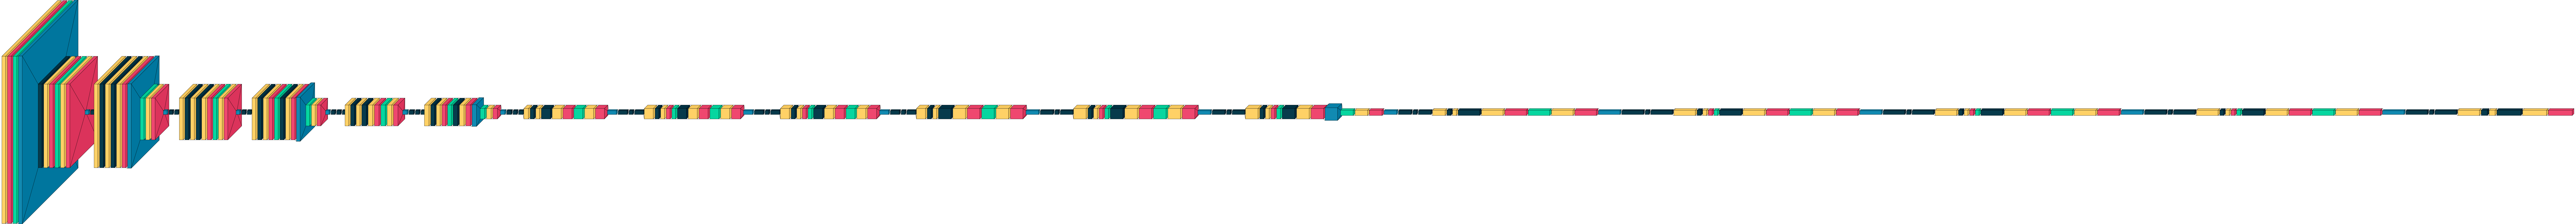

In [ ]:
visualkeras.layered_view(efficientNet)

In [ ]:
x = Flatten()(efficientNet.output)
x = tf.keras.layers.Dense(numberOfClass,activation='softmax')(x)

# creating our model.
model = tf.keras.models.Model(inputs=efficientNet.input, outputs = x)

Layers of the Model

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                            

## Visualize of the Model

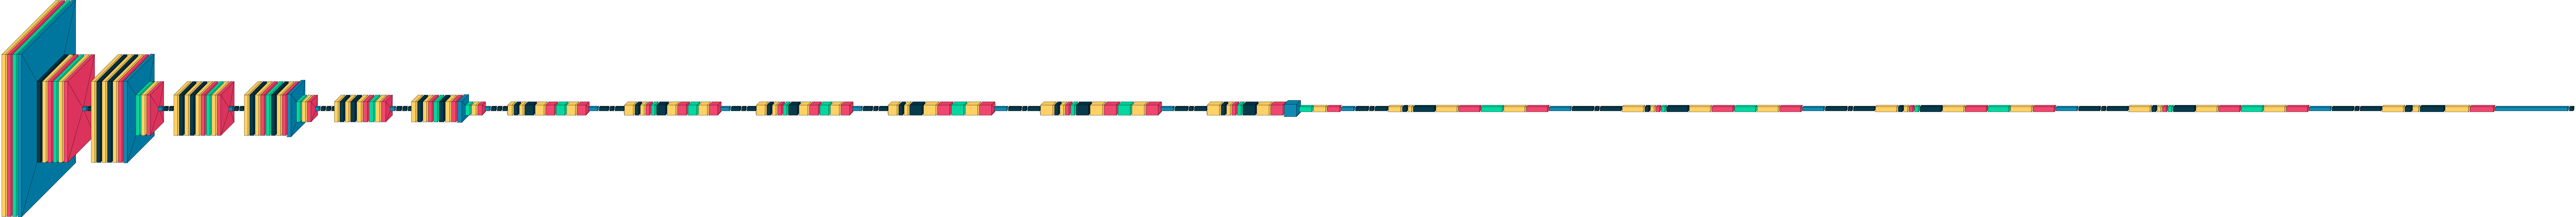

In [ ]:
visualkeras.layered_view(model)

Selanjutnya dilakukan pendefinisian model dengan optimasi Adam dan optimasi SGD. Fungsi loss yang digunakan yakni categorical crossentropy dan metrics akurasi.

## Adam Optimizer

In [ ]:
modela1 = model
opt_a1 = tf.keras.optimizers.Adam(learning_rate=1e-2)
modela1.compile(loss='categorical_crossentropy',
              optimizer = opt_a1, 
              metrics= ['accuracy'])

In [ ]:
modela2 = model
opt_a2 = tf.keras.optimizers.Adam(learning_rate=1e-3)
modela2.compile(loss='categorical_crossentropy',
              optimizer = opt_a2, 
              metrics= ['accuracy'])

## SGD

In [ ]:
models1 = model
opt_s1 = tf.keras.optimizers.SGD(learning_rate=1e-2)
models1.compile(loss='categorical_crossentropy',
              optimizer = opt_s1, 
              metrics= ['accuracy'])

In [ ]:
models2 = model
opt_s2 = tf.keras.optimizers.SGD(learning_rate=1e-3)
models2.compile(loss='categorical_crossentropy',
              optimizer = opt_s2, 
              metrics= ['accuracy'])

# Model Training

Selanjutnya dilakukan model training.

## Adam

In [ ]:
train.class_indices

{'Excellent': 0, 'Great': 1, 'Okay': 2, 'Poor': 3, 'Uncertain': 4}

In [ ]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("/content/drive/MyDrive/Bangkit/Dataset").rglob("*.png")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 15, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Modela1_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_a1 = modela1.fit(train,
                 epochs =300, 
                 verbose=1, 
                 batch_size=32,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

Epoch 1/300
96/96 [==============================] - ETA: 0s - loss: 1.7096 - accuracy: 0.3304
Epoch 1: val_accuracy improved from -inf to 0.20312, saving model to Modela1_Best.h5
96/96 [==============================] - 132s 1s/step - loss: 1.7096 - accuracy: 0.3304 - val_loss: 1.6211 - val_accuracy: 0.2031
Epoch 2/300
96/96 [==============================] - ETA: 0s - loss: 1.4661 - accuracy: 0.4220
Epoch 2: val_accuracy improved from 0.20312 to 0.37813, saving model to Modela1_Best.h5
96/96 [==============================] - 131s 1s/step - loss: 1.4661 - accuracy: 0.4220 - val_loss: 1.6100 - val_accuracy: 0.3781
Epoch 3/300
96/96 [==============================] - ETA: 0s - loss: 1.3520 - accuracy: 0.4596
Epoch 3: val_accuracy did not improve from 0.37813
96/96 [==============================] - 127s 1s/step - loss: 1.3520 - accuracy: 0.4596 - val_loss: 1.6450 - val_accuracy: 0.2719
Epoch 4/300
96/96 [==============================] - ETA: 0s - loss: 1.2675 - accuracy: 0.4997
Epoch 

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 9, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Modela2_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_a2 = modela2.fit(train,
                 epochs =300, 
                 verbose=1, 
                 batch_size=16,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

Epoch 1/300
96/96 [==============================] - ETA: 0s - loss: 0.7454 - accuracy: 0.7182
Epoch 1: val_accuracy improved from -inf to 0.34062, saving model to Modela2_Best.h5
96/96 [==============================] - 129s 1s/step - loss: 0.7454 - accuracy: 0.7182 - val_loss: 1.6122 - val_accuracy: 0.3406
Epoch 2/300
96/96 [==============================] - ETA: 0s - loss: 0.7397 - accuracy: 0.7130
Epoch 2: val_accuracy improved from 0.34062 to 0.38750, saving model to Modela2_Best.h5
96/96 [==============================] - 129s 1s/step - loss: 0.7397 - accuracy: 0.7130 - val_loss: 1.4851 - val_accuracy: 0.3875
Epoch 3/300
96/96 [==============================] - ETA: 0s - loss: 0.7458 - accuracy: 0.7055
Epoch 3: val_accuracy improved from 0.38750 to 0.40312, saving model to Modela2_Best.h5
96/96 [==============================] - 129s 1s/step - loss: 0.7458 - accuracy: 0.7055 - val_loss: 1.4803 - val_accuracy: 0.4031
Epoch 4/300
96/96 [==============================] - ETA: 0s - l

## SGD

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 9, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Models1_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_s1 = models1.fit(train,
                 epochs =50, 
                 verbose=1, 
                 batch_size=32,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

Epoch 1/50
96/96 [==============================] - ETA: 0s - loss: 0.6834 - accuracy: 0.7332
Epoch 1: val_accuracy improved from -inf to 0.38125, saving model to Models1_Best.h5
96/96 [==============================] - 126s 1s/step - loss: 0.6834 - accuracy: 0.7332 - val_loss: 1.5596 - val_accuracy: 0.3812
Epoch 2/50
96/96 [==============================] - ETA: 0s - loss: 0.6815 - accuracy: 0.7322
Epoch 2: val_accuracy did not improve from 0.38125
96/96 [==============================] - 134s 1s/step - loss: 0.6815 - accuracy: 0.7322 - val_loss: 1.6008 - val_accuracy: 0.3750
Epoch 3/50
96/96 [==============================] - ETA: 0s - loss: 0.6567 - accuracy: 0.7502
Epoch 3: val_accuracy improved from 0.38125 to 0.39687, saving model to Models1_Best.h5
96/96 [==============================] - 132s 1s/step - loss: 0.6567 - accuracy: 0.7502 - val_loss: 1.5652 - val_accuracy: 0.3969
Epoch 4/50
96/96 [==============================] - ETA: 0s - loss: 0.6841 - accuracy: 0.7355
Epoch 4: v

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 9, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Models2_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_s2 = models2.fit(train,
                 epochs =300, 
                 verbose=1, 
                 batch_size=16,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

Epoch 1/300
96/96 [==============================] - ETA: 0s - loss: 0.5919 - accuracy: 0.7789
Epoch 1: val_accuracy improved from -inf to 0.39687, saving model to Models2_Best.h5
96/96 [==============================] - 130s 1s/step - loss: 0.5919 - accuracy: 0.7789 - val_loss: 1.6817 - val_accuracy: 0.3969
Epoch 2/300
96/96 [==============================] - ETA: 0s - loss: 0.6181 - accuracy: 0.7580
Epoch 2: val_accuracy did not improve from 0.39687
96/96 [==============================] - 130s 1s/step - loss: 0.6181 - accuracy: 0.7580 - val_loss: 1.7542 - val_accuracy: 0.3500
Epoch 3/300
96/96 [==============================] - ETA: 0s - loss: 0.5878 - accuracy: 0.7808
Epoch 3: val_accuracy improved from 0.39687 to 0.41250, saving model to Models2_Best.h5
96/96 [==============================] - 130s 1s/step - loss: 0.5878 - accuracy: 0.7808 - val_loss: 1.6796 - val_accuracy: 0.4125
Epoch 4/300
96/96 [==============================] - ETA: 0s - loss: 0.6128 - accuracy: 0.7727
Epoch 

# Visualize of the Graph

Dari hasil model training, kemudian dilakukan visualisasi dengan grafik terhadap hasil validasi loss dan validasi accuracy pada masing-masing model.

In [ ]:
print(hist_a1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


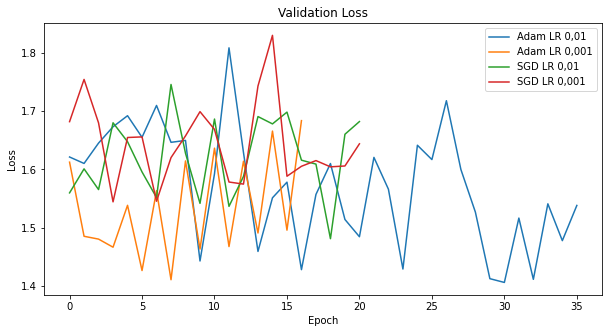

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["val_loss"],label = "Adam LR 0,01")
plt.plot(hist_a2.history["val_loss"],label = "Adam LR 0,001")
plt.plot(hist_s1.history["val_loss"],label = "SGD LR 0,01")
plt.plot(hist_s2.history["val_loss"],label = "SGD LR 0,001")
plt.title("Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

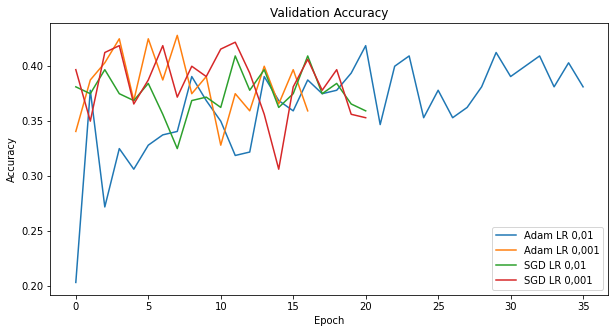

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["val_accuracy"],label = "Adam LR 0,01")
plt.plot(hist_a2.history["val_accuracy"],label = "Adam LR 0,001")
plt.plot(hist_s1.history["val_accuracy"],label = "SGD LR 0,01")
plt.plot(hist_s2.history["val_accuracy"],label = "SGD LR 0,001")
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Adam

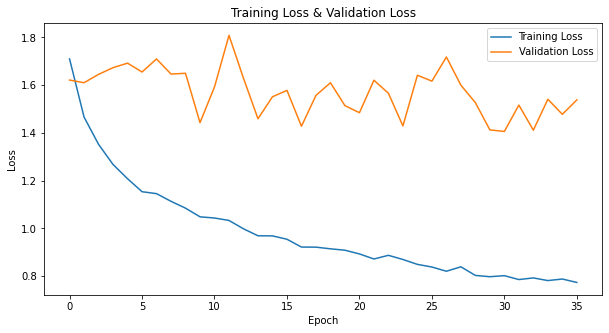

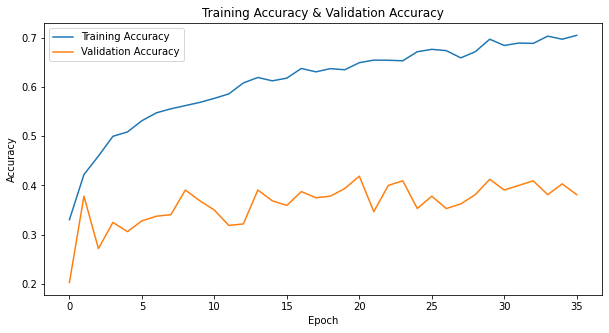

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["loss"],label = "Training Loss")
plt.plot(hist_a1.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_a1.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

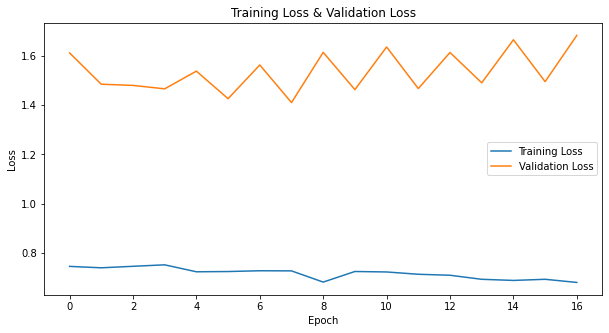

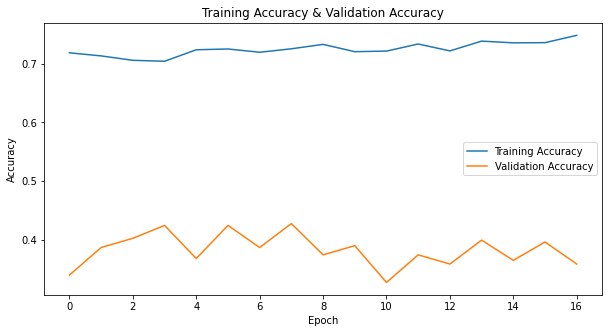

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a2.history["loss"],label = "Training Loss")
plt.plot(hist_a2.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_a2.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_a2.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## SGD

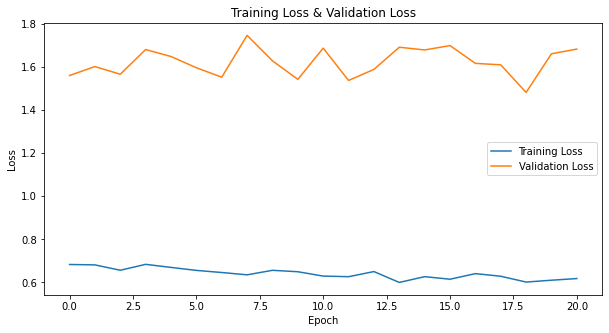

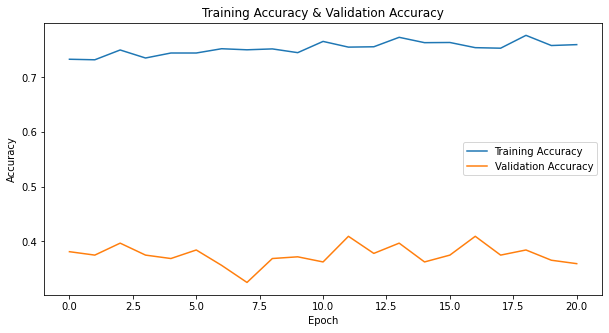

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_s1.history["loss"],label = "Training Loss")
plt.plot(hist_s1.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_s1.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_s1.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

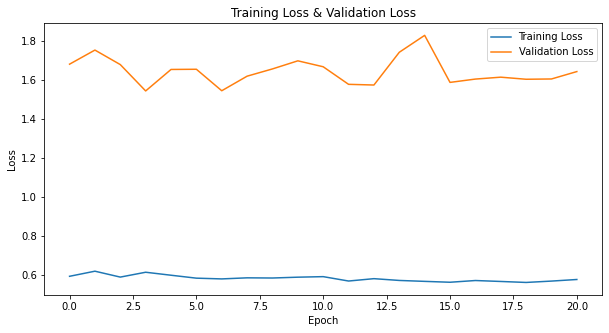

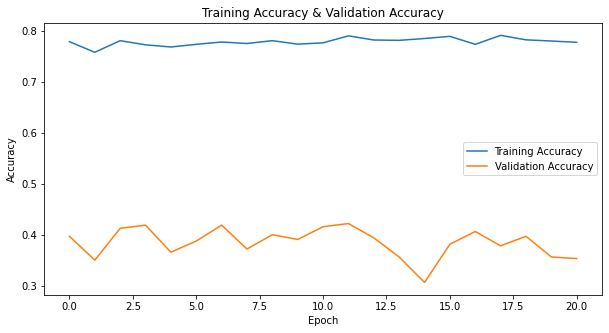

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_s2.history["loss"],label = "Training Loss")
plt.plot(hist_s2.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_s2.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_s2.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Best Model

Diperoleh model yang sangat baik yaitu EfficientNet B0 dengan Adam optimizer dan learning rate 0,001. Kemudian load model untuk dilakukan evaluasi model.

In [ ]:
modelf = load_model("Models2_Best.h5")

In [ ]:
modelf.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                            

# Model Evaluation

Selanjutnya melakukan evaluasi model menggunakan data uji.

In [ ]:
predictions = modelf.predict_generator(test)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1) 

true_classes = test.classes
class_labels = list(test.class_indices.keys()) 

UnimplementedError: ignored

In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

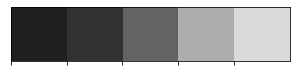

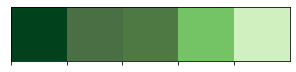

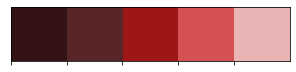

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

NameError: ignored

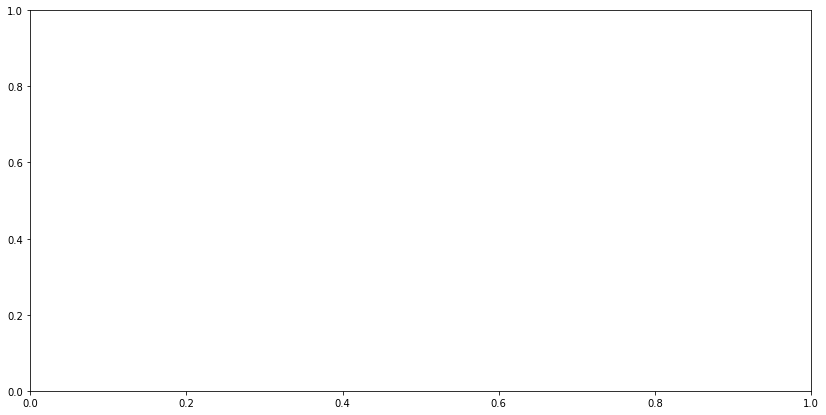

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))

sns.heatmap(confusion_matrix(true_classes, predicted_classes),
            ax=ax,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            cmap=colors_green[::-1],
            alpha=0.7,
            linewidths=2,
            linecolor=colors_dark[3]
            )

fig.text(s='Confusion Matrix',
         size=18,
         fontweight='bold',
         fontname='monospace',
         color=colors_dark[1],
         y=0.92,
         x=0.28,
         alpha=0.8)
print(confusion_matrix(true_classes, predicted_classes))
plt.show()

In [ ]:
def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )
  
  return img

Upload Gambar

In [ ]:
from google.colab import files
from keras.preprocessing import image

In [ ]:
train.class_indices

{'Excellent': 0, 'Great': 1, 'Okay': 2, 'Poor': 3, 'Uncertain': 4}

Saving w0009_s01_pLND_r03.png to w0009_s01_pLND_r03.png
Okay 0.85201126


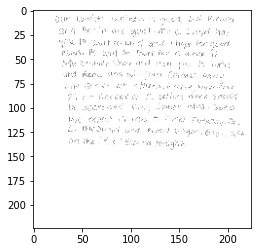

In [ ]:
def predict(image_upload):
  for fn in image_upload.keys():
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(224,224))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    images = np.vstack([x])
    classes = modelf.predict(images, batch_size=10) 
    print( labels[np.argmax(classes)], np.max(classes) )

image_test = files.upload()
predict(image_test)

# Save Model

Selanjutnya menyimpan model yang dipilih untuk selanjutnya dilakukan deployment

In [ ]:
modelf.save("/content/drive/MyDrive/Bangkit/Dataset/model_experiment.h5")